<h1>Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt

<h1>Задача 1. Дан набор из $p$ матриц размерностью $(n, n)$ и $p$ векторов размерностью $(n, 1)$, найти сумму произведений матриц на векторы. Написать тесты для кода

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def sum_prod(X, V):
    '''
    X - матрицы (p, n, n)
    V - векторы (p, n, 1)
    Гарантируется, что len(X) == len(V)
    '''
    result = np.zeros((X[0].shape[0], 1))
    for x, v in zip(X, V):
        result += np.dot(x, v) 
    return result

class TestSumProd(unittest.TestCase):
    def test_basic_case(self):
        X = [np.array([[1, 2], [3, 4]]), np.array([[5, 6], [7, 8]])]
        V = [np.array([[1], [1]]), np.array([[1], [1]])]
        result = sum_prod(X, V)
        expected = np.array([[1+2 + 5 + 6], [3+4 + 7 + 8]])
        np.testing.assert_array_equal(result, expected)

    def test_single_matrix_vector(self):
        X = [np.array([[2, 0], [0, 3]])]
        V = [np.array([[1], [1]])]
        result = sum_prod(X, V)
        expected = np.array([[2], [3]])
        np.testing.assert_array_equal(result, expected)

    def test_zero_matrices(self):
        X = [np.zeros((2, 2)), np.zeros((2, 2))]
        V = [np.array([[1], [1]]), np.array([[1], [1]])]
        result = sum_prod(X, V)
        expected = np.zeros((2, 1))
        np.testing.assert_array_equal(result, expected)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...
----------------------------------------------------------------------
Ran 3 tests in 0.014s

OK


<h1>Задача 2. Дана матрица M, напишите функцию, которая бинаризует матрицу по некоторому threshold (то есть, все значения большие threshold становятся равными 1, иначе 0). Напишите тесты для кода

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def binarize(M, threshold=0.5):
    return (M > threshold).astype(int)

class TestBinarize(unittest.TestCase):
    def test_basic_case(self):
        M = np.array([[0.1, 0.6], [0.8, 0.3]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 1], [1, 0]])
        np.testing.assert_array_equal(result, expected)

    def test_all_ones(self):
        M = np.array([[0.7, 0.8], [0.9, 1.0]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[1, 1], [1, 1]])
        np.testing.assert_array_equal(result, expected)

    def test_all_zeros(self):
        M = np.array([[0.1, 0.2], [0.3, 0.4]])
        result = binarize(M, threshold=0.5)
        expected = np.array([[0, 0], [0, 0]])
        np.testing.assert_array_equal(result, expected)

    def test_different_threshold(self):
        M = np.array([[0.1, 0.6], [0.8, 0.3]])
        result = binarize(M, threshold=0.7)
        expected = np.array([[0, 0], [1, 0]])
        np.testing.assert_array_equal(result, expected)

    def test_zero_threshold(self):
        M = np.array([[0.0, 0.2], [0.5, 1.0]])
        result = binarize(M, threshold=0.0)
        expected = np.array([[0, 1], [1, 1]])
        np.testing.assert_array_equal(result, expected)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........
----------------------------------------------------------------------
Ran 8 tests in 0.008s

OK


<h1>Задача 3. Напишите функцию, которая возвращает уникальные элементы из каждой строки матрицы. Напишите такую же функцию, но для столбцов. Напишите тесты для кода

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def unique_rows(mat):
    return [np.unique(row) for row in mat]

def unique_columns(mat):
    return [np.unique(col) for col in mat.T]

class TestUnique(unittest.TestCase):
    def test_unique_rows(self):
        mat = np.array([[1, 2, 2], [3, 3, 4], [5, 5, 5]])
        result = unique_rows(mat)
        expected = [np.array([1, 2]), np.array([3, 4]), np.array([5])]
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_unique_columns(self):
        mat = np.array([[1, 2, 2], [3, 3, 4], [1, 5, 5]])
        result = unique_columns(mat)
        expected = [np.array([1, 3]), np.array([2, 3, 5]), np.array([2, 4, 5])]
        for res, exp in zip(result, expected):
            np.testing.assert_array_equal(res, exp)

    def test_all_unique(self):
        mat = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
        result_rows = unique_rows(mat)
        result_columns = unique_columns(mat)
        expected_rows = [np.array([1, 2, 3]), np.array([4, 5, 6]), np.array([7, 8, 9])]
        expected_columns = [np.array([1, 4, 7]), np.array([2, 5, 8]), np.array([3, 6, 9])]
        for res, exp in zip(result_rows, expected_rows):
            np.testing.assert_array_equal(res, exp)
        for res, exp in zip(result_columns, expected_columns):
            np.testing.assert_array_equal(res, exp)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

...........
----------------------------------------------------------------------
Ran 11 tests in 0.008s

OK


<h1>Задача 4. Напишите функцию, которая заполняет матрицу с размерами $(m, n)$ случайными числами, распределенными по нормальному закону. Затем считает мат. ожидание и дисперсию для каждого из столбцов и строк, а также строит для каждой строки и столбца гистограмму значений (использовать функцию hist из модуля matplotlib.plot)

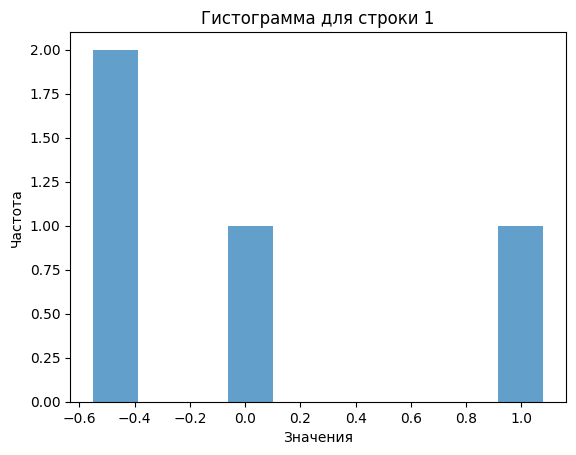

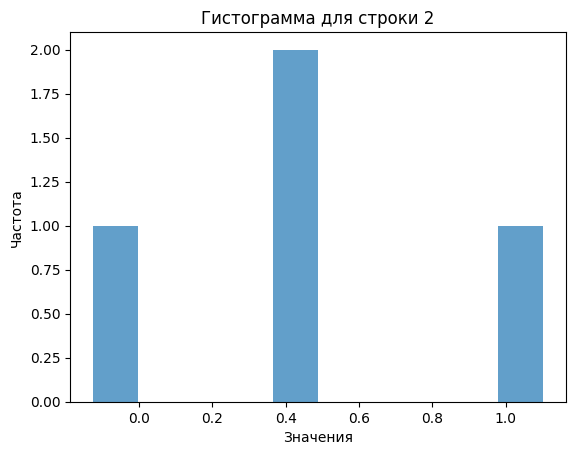

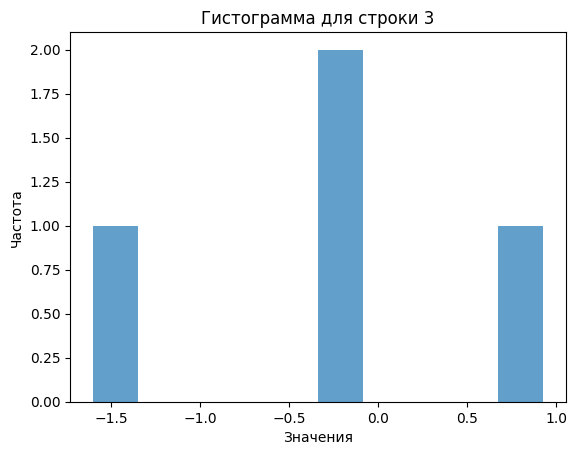

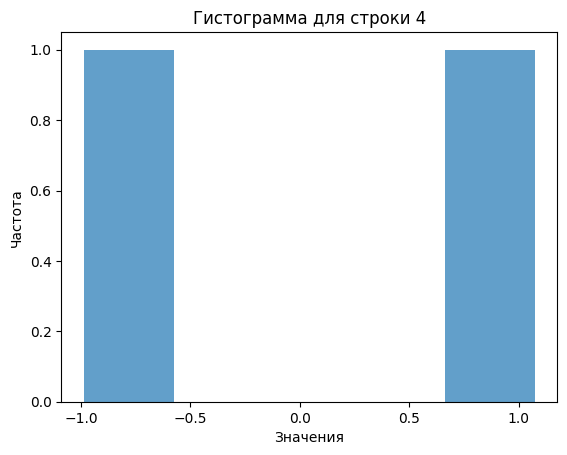

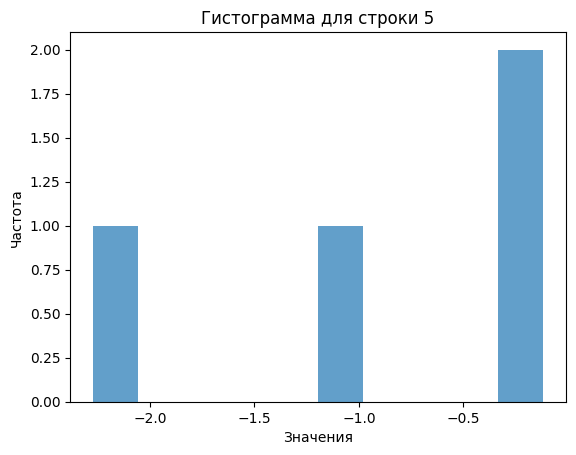

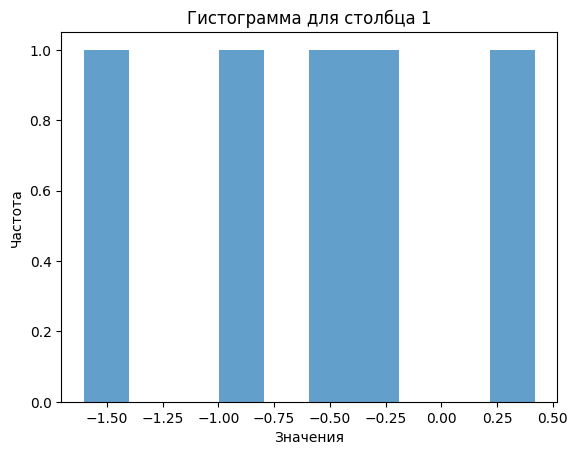

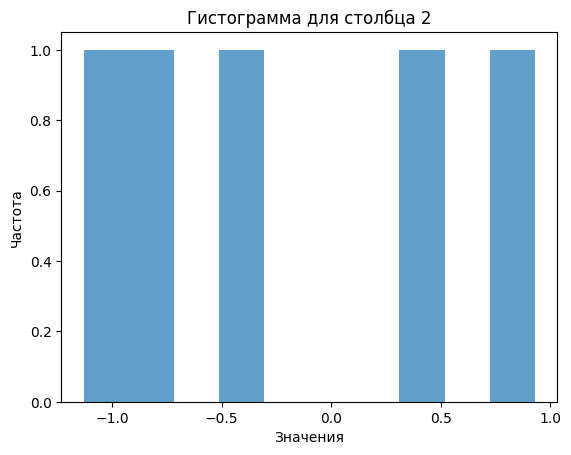

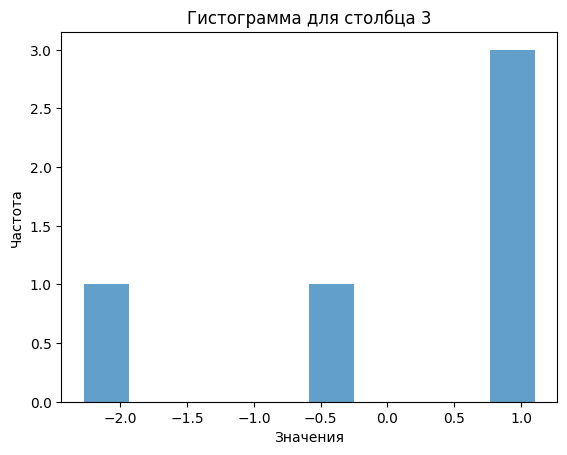

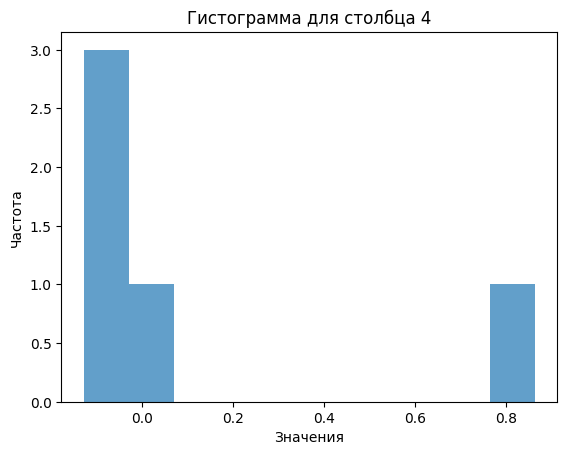

.

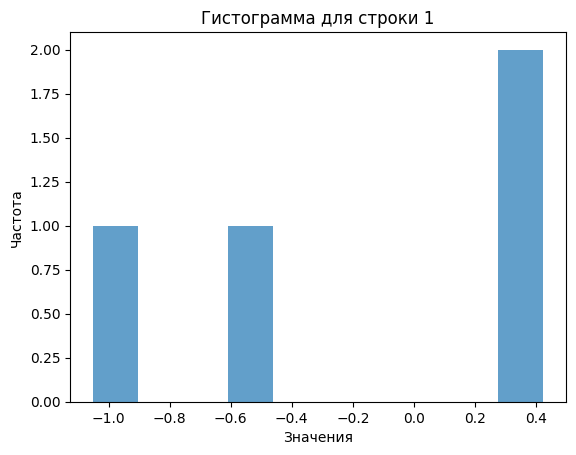

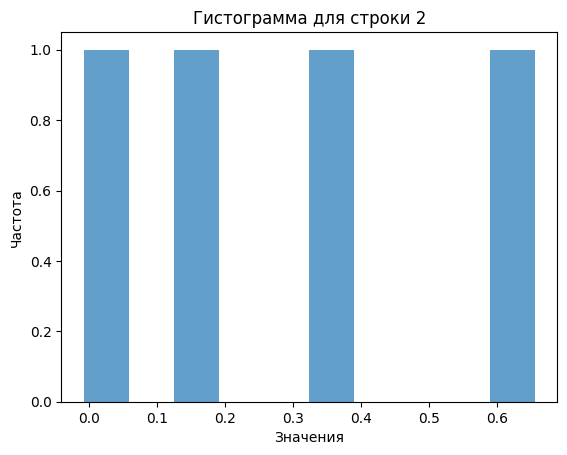

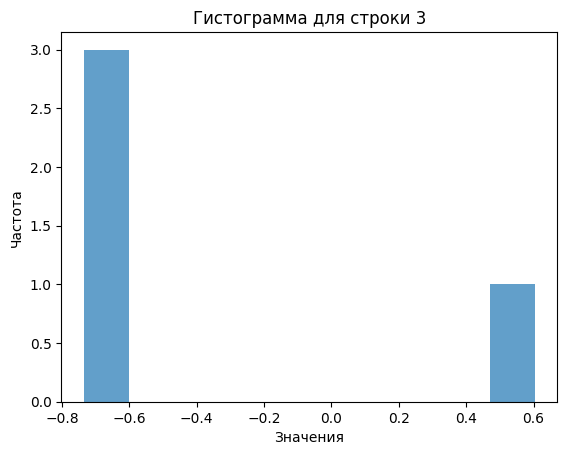

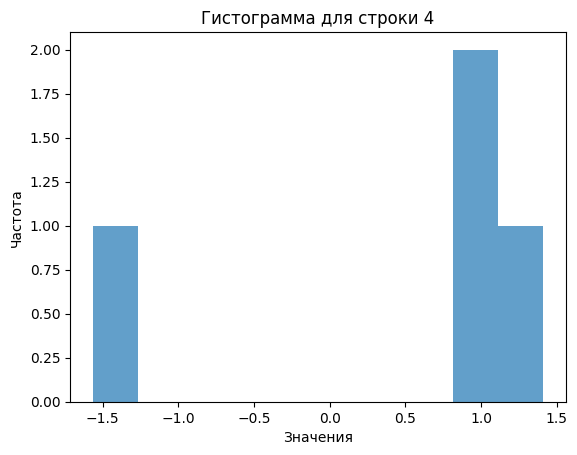

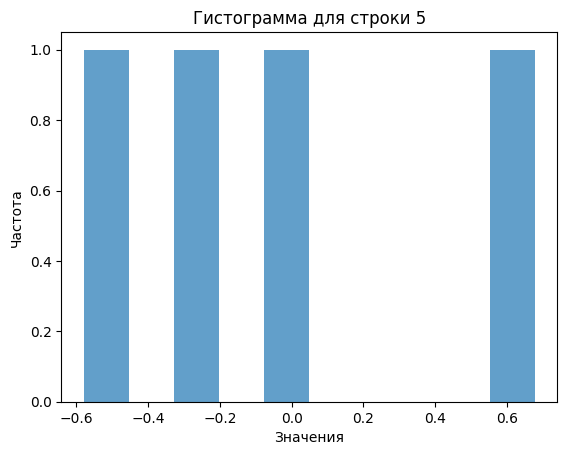

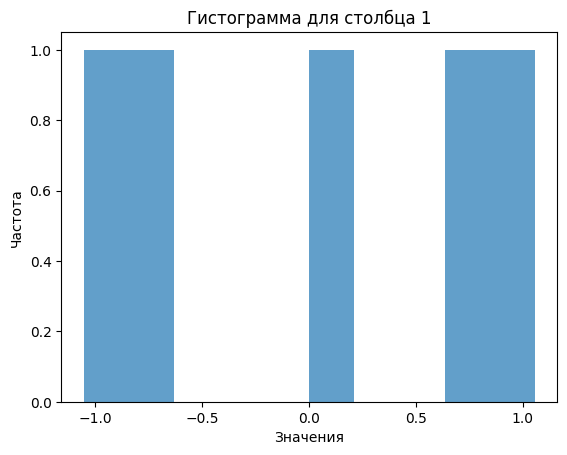

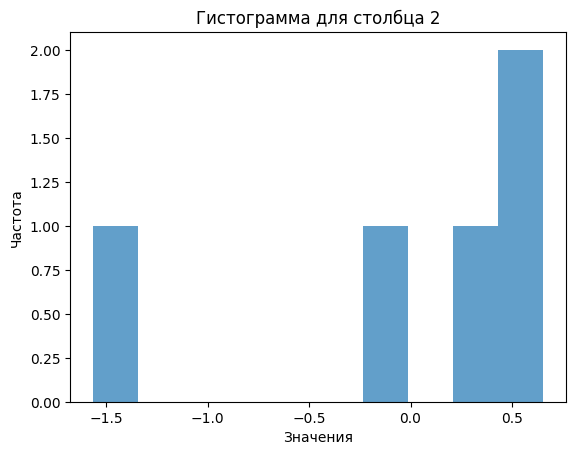

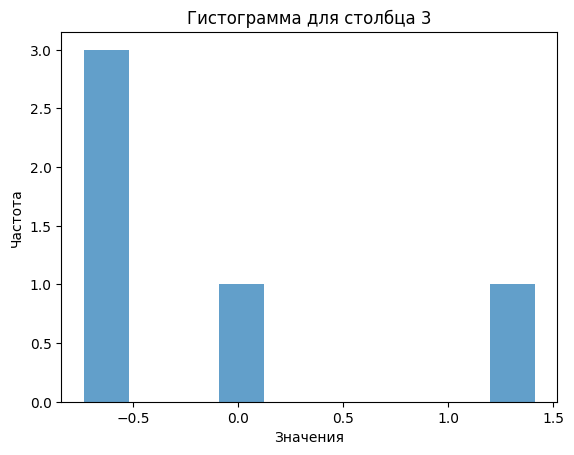

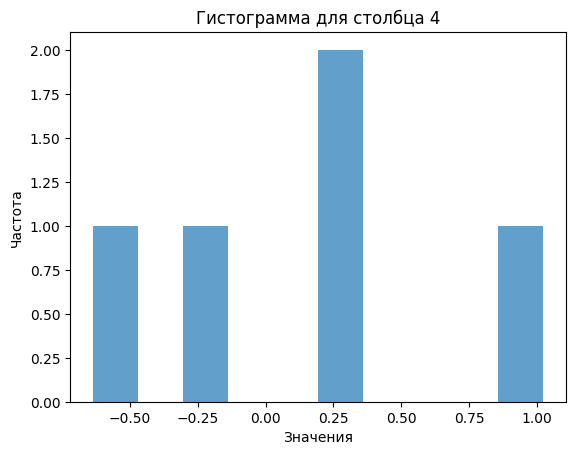

.
----------------------------------------------------------------------
Ran 2 tests in 1.607s

OK


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def generate_matrix_and_statistics(m, n, plot):

    matrix = np.random.normal(loc=0, scale=1, size=(m, n))

    row_means = np.mean(matrix, axis=1)
    row_vars = np.var(matrix, axis=1)
    col_means = np.mean(matrix, axis=0)
    col_vars = np.var(matrix, axis=0)

    if plot:
        for i in range(m):
            plt.figure()
            plt.hist(matrix[i, :], bins=10, alpha=0.7)
            plt.title(f'Гистограмма для строки {i + 1}')
            plt.xlabel('Значения')
            plt.ylabel('Частота')
            plt.show()
            plt.close()

        for j in range(n):
            plt.figure()
            plt.hist(matrix[:, j], bins=10, alpha=0.7)
            plt.title(f'Гистограмма для столбца {j + 1}')
            plt.xlabel('Значения')
            plt.ylabel('Частота')
            plt.show()
            plt.close()

    return matrix, row_means, row_vars, col_means, col_vars

#тут графики будут после каждого закрытия, не пугайтесь, просто прокликайте закрытие
class TestMatrixStatistics(unittest.TestCase):

    def setUp(self):
        self.string = ""

    def tearDown(self):
        self.string = None

    def test_matrix_shape(self):
        m, n = 5, 4
        matrix, _, _, _, _ = generate_matrix_and_statistics(m, n, plot=True)
        self.assertEqual(matrix.shape, (m, n))

    def test_means_and_vars(self):
        m, n = 5, 4
        matrix, row_means, row_vars, col_means, col_vars = generate_matrix_and_statistics(m, n, plot=True)

        self.assertTrue(np.allclose(row_means, np.mean(matrix, axis=1)))
        self.assertTrue(np.allclose(row_vars, np.var(matrix, axis=1)))
        self.assertTrue(np.allclose(col_means, np.mean(matrix, axis=0)))
        self.assertTrue(np.allclose(col_vars, np.var(matrix, axis=0)))

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


<h1>Задача 5. Напишите функцию, которая заполняет матрицу $(m, n)$ в шахматном порядке заданными числами $a$ и $b$. Напишите тесты для кода

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def chess(m, n, a, b):
    matrix = []
    for i in range(m):
        row = []
        for j in range(n):
            if (i + j) % 2 == 0:
                row.append(a)
            else:
                row.append(b)
        matrix.append(row)
    return matrix

class TestChess(unittest.TestCase):

    def setUp(self):
        self.string = ""

    def tearDown(self):
        self.string = None

    def test_3x3(self):
        self.assertEqual(
            chess(3, 3, 1, 0),
            [
                [1, 0, 1],
                [0, 1, 0],
                [1, 0, 1]
            ]
        )
    
    def test_4x4(self):
        self.assertEqual(
            chess(4, 4, 'a', 'b'),
            [
                ['a', 'b', 'a', 'b'],
                ['b', 'a', 'b', 'a'],
                ['a', 'b', 'a', 'b'],
                ['b', 'a', 'b', 'a']
            ]
        )

    def test_2x5(self):
        self.assertEqual(
            chess(2, 5, 3, 4),
            [
                [3, 4, 3, 4, 3],
                [4, 3, 4, 3, 4]
            ]
        )

    def test_1x1(self):
        self.assertEqual(
            chess(1, 1, 7, 9),
            [[7]]
        )

    def test_2x2(self):
        self.assertEqual(
            chess(2, 2, 1, 2),
            [
                [1, 2],
                [2, 1]
            ]
        )

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


..................
----------------------------------------------------------------------
Ran 18 tests in 0.012s

OK


<h1>Задача 6. Напишите функцию, которая отрисовывает прямоугольник с заданными размерами (a, b) на изображении размера (m, n), цвет фона задайте в схеме RGB, как и цвет прямоугольника. Цвета также должны быть параметрами функции. Напишите аналогичную функцию но для овала с полуосями a и b. Напишите тесты для кода.
Примечание: уравнение эллипса (границы овала) можно записать как:
<h1>$\frac{(x-x_0)^2}{a^2}+\frac{(y-y_0)^2}{b^2}=1$

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import unittest
from PIL import Image, ImageDraw

def draw_rectangle(a, b, m, n, rectangle_color, background_color):

    image = Image.new("RGB", (n, m), background_color)
    draw = ImageDraw.Draw(image)

    #границы
    top_left = (0, 0)
    bottom_right = (a, b)

    draw.rectangle([top_left, bottom_right], fill=rectangle_color)

    return image

def draw_ellipse(a, b, m, n, ellipse_color, background_color):
    image = Image.new("RGB", (n, m), background_color)
    draw = ImageDraw.Draw(image)

    #границы
    left = (n - a) // 2
    right = left + a
    top = (m - b) // 2
    bottom = top + b

    draw.ellipse([left, top, right, bottom], fill=ellipse_color)

    return image


#тесты
class TestShapes(unittest.TestCase):
    def test_draw_rectangle(self):

        a, b = 100, 50
        m, n = 200, 200
        rectangle_color = (255, 0, 0) 
        background_color = (255, 255, 255) 

        image = draw_rectangle(a, b, m, n, rectangle_color, background_color)

        self.assertEqual(image.size, (n, m))

        self.assertEqual(image.getpixel((a+1, b+1)), background_color)

        self.assertEqual(image.getpixel((50, 25)), rectangle_color)
        self.assertEqual(image.getpixel((a+1, b+1)), background_color)

    def test_draw_ellipse(self):
        a, b = 100, 50
        m, n = 200, 200
        ellipse_color = (0, 0, 255)
        background_color = (255, 255, 255)
        
        image = draw_ellipse(a, b, m, n, ellipse_color, background_color)

        self.assertEqual(image.size, (n, m))

        self.assertEqual(image.getpixel((a+1, b+1)), background_color)

        self.assertEqual(image.getpixel((100, 100)), ellipse_color) 
        self.assertEqual(image.getpixel((a+1, b+1)), background_color)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)


........................
----------------------------------------------------------------------
Ran 24 tests in 0.016s

OK


: 

<h1>Задача 7. Дан некий временной ряд. Для данного ряда нужно найти его: математическое ожидание, дисперсию, СКО, найти все локальные максимумы и минимумы (локальный максимум - это точка, которая больше своих соседних точек, а локальный минимум - это точка, которая меньше своих соседей), а также вычислить для данного ряда другой ряд, получаемый методом скользящего среднего с размером окна $p$.
<h1>Примечание: метод скользящего среднего подразумевает нахождение среднего из подмножетсва ряда размером $p$

In [23]:
import numpy as np
import unittest

def calculate_statistics(time_series):
    mean = np.mean(time_series)
    variance = np.var(time_series)
    std_dev = np.std(time_series)
    return mean, variance, std_dev

def find_local_extrema(time_series):
    local_max = []
    local_min = []
    n = len(time_series)

    for i in range(1, n - 1):
        if time_series[i] > time_series[i - 1] and time_series[i] > time_series[i + 1]:
            local_max.append((i, time_series[i]))
        if time_series[i] < time_series[i - 1] and time_series[i] < time_series[i + 1]:
            local_min.append((i, time_series[i]))

    if n > 1:
        if time_series[0] > time_series[1]: 
            local_max.insert(0, (0, time_series[0]))
        elif time_series[0] < time_series[1]:
            local_min.insert(0, (0, time_series[0]))

    if n > 1:
        if time_series[n - 1] > time_series[n - 2]:  
            local_max.append((n - 1, time_series[n - 1]))
        elif time_series[n - 1] < time_series[n - 2]:  
            local_min.append((n - 1, time_series[n - 1]))

    return local_max, local_min

def moving_average(time_series, p):
    return np.convolve(time_series, np.ones(p)/p, mode='valid')

# Тесты
class TestTimeSeriesAnalysis(unittest.TestCase):

    def setUp(self):

        self.time_series = [1, 3, 7, 1, 2, 6, 0, 1, 4, 1]
        self.p = 3 

    def test_statistics(self):
        mean, variance, std_dev = calculate_statistics(self.time_series)
        self.assertAlmostEqual(mean, 2.6, places=1)
        self.assertAlmostEqual(variance, 5.04, places=2)
        self.assertAlmostEqual(std_dev, 2.24, places=2)

    def test_local_extrema(self):
        local_max, local_min = find_local_extrema(self.time_series)

        self.assertEqual(sorted(local_max), [(2, 7), (5, 6), (8, 4)])
        self.assertEqual(sorted(local_min), [(0, 1), (3, 1), (6, 0), (9, 1)])

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........................
----------------------------------------------------------------------
Ran 24 tests in 0.015s

OK


<h1> Задача 8. Дан некоторый вектор с целочисленными метками классов, напишите функцию, которая выполняет one-hot-encoding для данного вектора
<h1> One-hot-encoding - представление, в котором на месте метки некоторого класса стоит 1, в остальных позициях стоит 0. Например для вектора [0, 2, 3, 0] one-hot-encoding выглядит как: [[1, 0, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1], [1, 0, 0, 0]]

In [24]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

def one_hot_encode(vector):
    if len(vector) == 0:
        return np.array([])

    num_classes = np.max(vector) + 1

    one_hot_matrix = np.zeros((len(vector), num_classes))
    one_hot_matrix[np.arange(len(vector)), vector] = 1
    return one_hot_matrix

class TestOneHotEncode(unittest.TestCase):
    def test_one_hot_encode(self):
        vector = np.array([0, 2, 3, 0])
        result = one_hot_encode(vector)
        expected = np.array([
            [1, 0, 0, 0],
            [0, 0, 1, 0],
            [0, 0, 0, 1],
            [1, 0, 0, 0]
        ])
        np.testing.assert_array_equal(result, expected)

    def test_empty_vector(self):
        vector = np.array([])
        result = one_hot_encode(vector)
        expected = np.array([])
        np.testing.assert_array_equal(result, expected)

if __name__ == '__main__':
    unittest.main(argv=['first-arg-is-ignored'], exit=False)

........................
----------------------------------------------------------------------
Ran 24 tests in 0.014s

OK
